
# **Machine Learning predictions of house prices**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

1. **Exploratory Data Analysis (EDA)**:

In [3]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')
train_data.set_index("Id",inplace=True)
test_data.set_index("Id",inplace=True)
print(train_data.info())
print(test_data.info())
#The above command shows that there are some null values in different features of the data.

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
display(train_data.head())
print(train_data.describe())
display(test_data.head())
print(test_data.describe())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ..

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


        MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000  ...   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342  ...   
std      30.390071     21.130467   177.625900   455.268042   176.753926  ...   
min 

In [5]:
#Filling missing values according to the data information.
#Some of the null data is relevant for the study and indicates the absence of some feature.
enc=OrdinalEncoder(encoded_missing_value=-1)
train_data[["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
            "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]]=enc.fit_transform(train_data[["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
            "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]])
test_data[["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
            "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]]=enc.fit_transform(test_data[["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
            "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]])
features=["LotFrontage","MasVnrArea","GarageYrBlt","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]
#filling the numerical data for the mean value.
for feature in features:
  train_data[feature]=train_data[feature].fillna(train_data[feature].mean())
  test_data[feature]=test_data[feature].fillna(test_data[feature].mean())

categorical_features=["Electrical","MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional","SaleType"]
#flling the categorical data for the most repeated categorical value.
for feature in categorical_features:
  train_data[feature]=train_data[feature].fillna(train_data[feature].mode()[0])
  test_data[feature]=test_data[feature].fillna(test_data[feature].mode()[0])
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [6]:
#Converting strings into numerical values using OrdinalEncoder
train_data[(((train_data.dtypes=="object").replace(False,np.nan)).dropna()).index]=enc.fit_transform(train_data[(((train_data.dtypes=="object").replace(False,np.nan)).dropna()).index])
test_data[(((test_data.dtypes=="object").replace(False,np.nan)).dropna()).index]=enc.fit_transform(test_data[(((test_data.dtypes=="object").replace(False,np.nan)).dropna()).index])

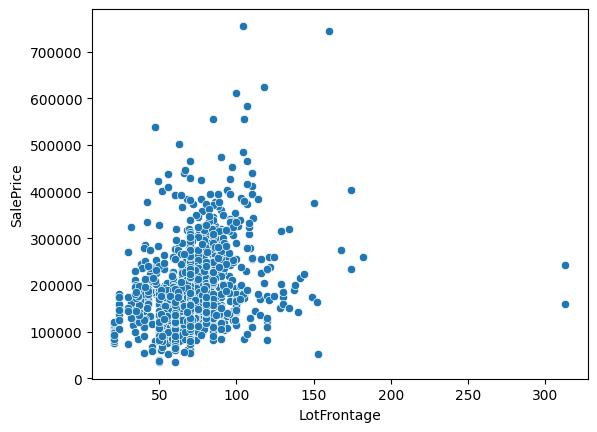

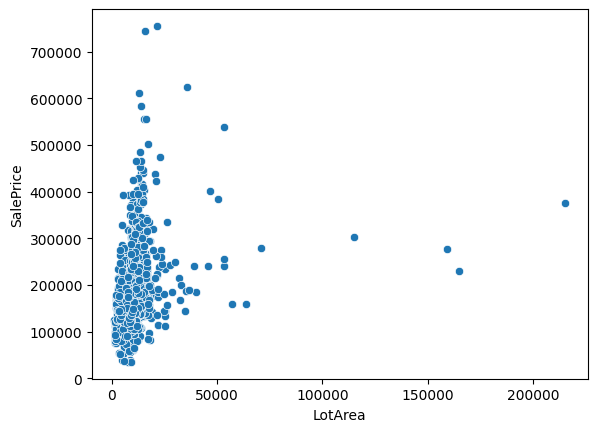

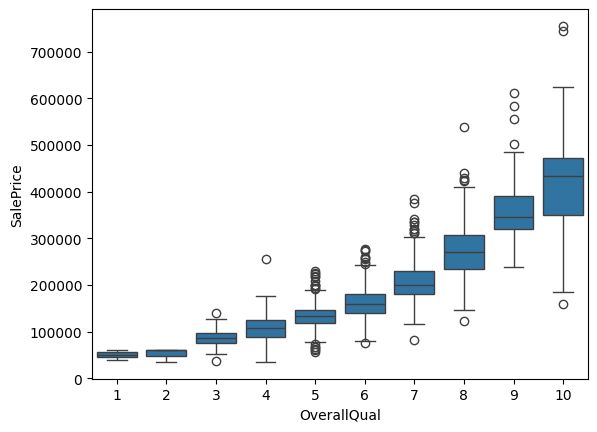

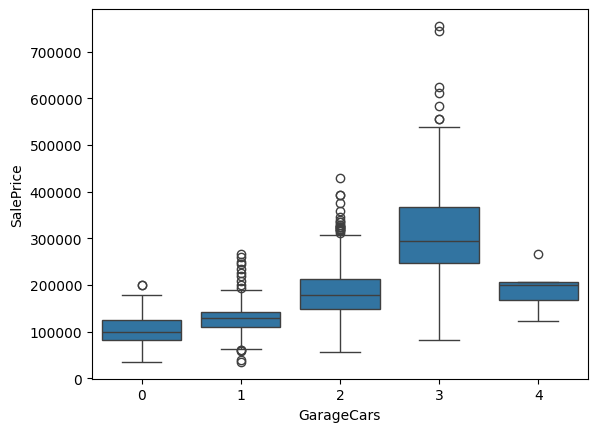

In [7]:
#LofFrontage vs price plot
sns.scatterplot(x="LotFrontage",y="SalePrice",data=train_data)
plt.show()
#LotArea vs price plot
sns.scatterplot(x="LotArea",y="SalePrice",data=train_data)
plt.show()
#Overall Quality vs Price boxplot.
sns.boxplot(x="OverallQual",y="SalePrice",data=train_data)
plt.show()
#Garage Cars vs Price boxplot.
sns.boxplot(x="GarageCars",y="SalePrice",data=train_data)
plt.show()


In [8]:
train_data.corr()["SalePrice"].sort_values(ascending=False)
#In this case were printed the correlation of some features with the SalePrice and sorted by values.

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
...,...
GarageFinish,-0.292483
HeatingQC,-0.400178
BsmtQual,-0.438881
KitchenQual,-0.589189


2. **Modeling data:**

In [9]:
#split train dataset into train_data and validation_data (Because test_data doesn´t have a SalePrice feature):
from sklearn.model_selection import train_test_split
X_train=train_data.drop("SalePrice",axis=1)
Y_train=train_data["SalePrice"]
X_train_new,X_val,Y_train_new,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

2.1 Random Forest Regressor:

In [10]:
#2.1 Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42,max_depth=3)
rfr.fit(X_train_new,Y_train_new)
print("Training data score:",rfr.score(X_train_new,Y_train_new))
print("Validation data score:",rfr.score(X_val,Y_val))

#Tuning model hyperparameters:
from sklearn.model_selection import GridSearchCV
gsearch=GridSearchCV(rfr,param_grid={"n_estimators":[50,100,200],"max_depth":[2,4,6,8]})
gsearch.fit(X_train_new,Y_train_new)
print("Best parameters:",gsearch.best_params_)

#Choosing the improved parameters:
rfr=RandomForestRegressor(n_estimators=200,random_state=42,max_depth=8)
rfr.fit(X_train_new,Y_train_new)
print("Improved training data score:",rfr.score(X_train_new,Y_train_new))
print("Improved validation data score:",rfr.score(X_val,Y_val))


Training data score: 0.7940750181419719
Validation data score: 0.7906786108081019
Best parameters: {'max_depth': 8, 'n_estimators': 200}
Improved training data score: 0.9665584898624028
Improved validation data score: 0.8903297163215803


In [11]:
#Making the cross validation
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(rfr,X_train_new,Y_train_new,cv=5)
print("Cross validation scores:",cross_score)
print("Cross validation mean score:",cross_score.mean())
print("Cross validation std:",cross_score.std())

Cross validation scores: [0.87638129 0.75708728 0.80604115 0.87605974 0.86675777]
Cross validation mean score: 0.8364654464382394
Cross validation std: 0.04755026689175106


In [14]:
# Predicting prices on the testing data
predictions=rfr.predict(test_data)
print(predictions)

[124290.26405216 153948.9539051  176700.74978288 ... 157466.33926723
 116945.60381262 223100.75067955]


2.2 Gradient Boosting Regressor:

In [18]:
#2.2 Gradient Boosting Regressor:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,random_state=42,max_depth=3)
gbr.fit(X_train_new,Y_train_new)
print("Training data score:",gbr.score(X_train_new,Y_train_new))
print("Validation data score:",gbr.score(X_val,Y_val))

#Tuning model hyperparameters:
gsearch=GridSearchCV(gbr,param_grid={"n_estimators":[50,100,200],"max_depth":[2,4,6,8]})
gsearch.fit(X_train_new,Y_train_new)
print("Best parameters:",gsearch.best_params_)

#Choosing the best parameters:
gbr=GradientBoostingRegressor(n_estimators=200,random_state=42,max_depth=4)
gbr.fit(X_train_new,Y_train_new)
print("Improved training data score:",gbr.score(X_train_new,Y_train_new))
print("Improved validation data score:",gbr.score(X_val,Y_val))

Training data score: 0.9684736521838853
Validation data score: 0.8990734428437879
Best parameters: {'max_depth': 4, 'n_estimators': 200}
Improved training data score: 0.9930863634560001
Improved validation data score: 0.9123783901501


In [19]:
#making the cross validation:
cross_score=cross_val_score(gbr,X_train_new,Y_train_new,cv=5)
print("Cross validation scores:",cross_score)
print("Cross validation mean score:",cross_score.mean())
print("Cross validation std:",cross_score.std())

Cross validation scores: [0.89257316 0.78597987 0.86383076 0.89491268 0.88800848]
Cross validation mean score: 0.8650609886789649
Cross validation std: 0.041060851642145034


In [20]:
#predicting prices on testing data:
predictions=gbr.predict(test_data)
print(predictions)


[132915.2540165  170335.29310509 173432.79512359 ... 181474.28323841
 123641.61697622 207339.4625494 ]


2.3 Extreme Gradient Boosting Regressor:

In [23]:
import xgboost as xgb
xgb_reg=xgb.XGBRegressor()
xgb_reg.fit(X_train_new,Y_train_new)
print("Training data score:",xgb_reg.score(X_train_new,Y_train_new))
print("Validation data score:",xgb_reg.score(X_val,Y_val))

#tuning model hyperparameters:
gsearch=GridSearchCV(xgb_reg,param_grid={"n_estimators":[50,100,200],"max_depth":[2,4,6,8]})
gsearch.fit(X_train_new,Y_train_new)
print("Best parameters:",gsearch.best_params_)

#choosing the best parameters:
xgb_reg=xgb.XGBRegressor(n_estimators=200,max_depth=4)
xgb_reg.fit(X_train_new,Y_train_new)
print("Improved training data score:",xgb_reg.score(X_train_new,Y_train_new))
print("Improved validation data score:",xgb_reg.score(X_val,Y_val))

Training data score: 0.9998638033866882
Validation data score: 0.9079837799072266
Best parameters: {'max_depth': 4, 'n_estimators': 200}
Improved training data score: 0.999189019203186
Improved validation data score: 0.9129106998443604


In [25]:
#making the cross validation:
cross_score=cross_val_score(xgb_reg,X_train_new,Y_train_new,cv=5)
print("Cross validation scores:",cross_score)
print("Cross validation mean score:",cross_score.mean())
print("Cross validation std:",cross_score.std())

Cross validation scores: [0.87905276 0.80921578 0.83232838 0.88352847 0.87778944]
Cross validation mean score: 0.8563829660415649
Cross validation std: 0.03004130873789287


In [24]:
#predicting prices on testing data:
predictions=xgb_reg.predict(test_data)
print(predictions)

[117817.336 152639.45  182679.97  ... 178069.9   115055.64  221398.39 ]
